
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

# Trabajo práctico entregable - Parte 2

In [1]:
import io
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [4]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [69]:
min=10000
max=200000
df[(df.salary_monthly_NETO > min) & (df.salary_monthly_NETO < max)]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                       \
                             count          mean           std      min   
profile_gender                                                            
Hombre                      4459.0  81604.741245  36188.505101  10700.0   
Mujer                        838.0  72286.367053  32465.561583  12000.0   
Otros                         25.0  80260.000000  44573.628227  34000.0   

                                                      
                    25%      50%       75%       max  
profile_gender                                        
Hombre          54000.0  78000.0  102000.0  199000.0  
Mujer           47775.0  67000.0   92000.0  199000.0  
Otros           40000.0  74000.0  101000.0  190000.0

In [70]:
is_man = df.profile_gender == 'Hombre'
groupA = df[(df.salary_monthly_NETO >min) & (df.salary_monthly_NETO < max) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > min) & (df.salary_monthly_NETO < max) & ~is_man].salary_monthly_NETO

Veamos la distribucion de las subpoblaciones

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


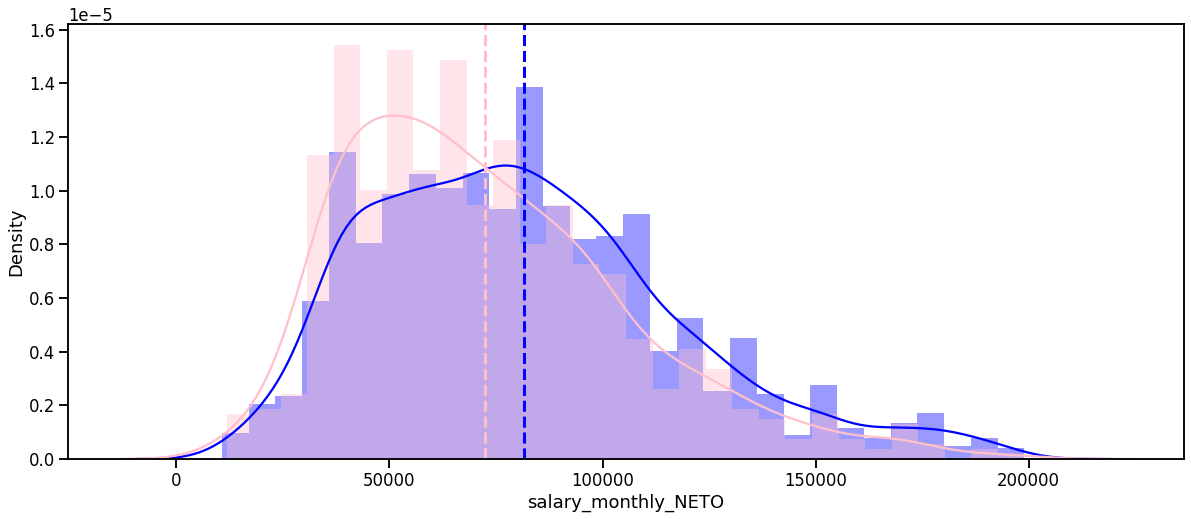

In [71]:
plt.figure(figsize=(20, 8))
ax1 = seaborn.distplot(groupA, bins=30, color='b')
ax2 = seaborn.distplot(groupB, bins=30, color='pink')
plt.axvline(numpy.mean(groupA), color='b', linestyle='dashed', linewidth=3)
plt.axvline(numpy.mean(groupB), color='pink', linestyle='dashed', linewidth=3)

KurtosistestResult(statistic=3.0130676987689227, pvalue=0.002586212174189478)

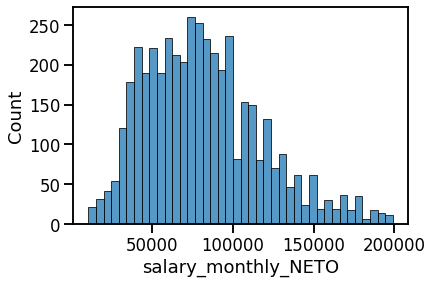

In [72]:
seaborn.histplot(groupA, bins=40)
scipy.stats.kurtosistest(groupA)

KurtosistestResult(statistic=3.0859000392992857, pvalue=0.002029370336118785)

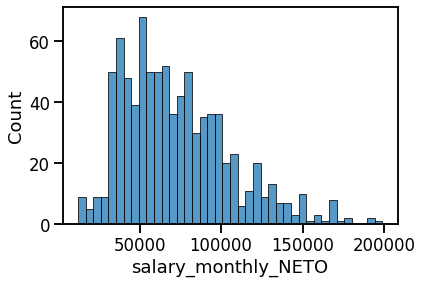

In [73]:
seaborn.histplot(groupB, bins=40)
scipy.stats.kurtosistest(groupB)

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

El estimador puntual para la diferencia de medias poblacionales $μ_1 -μ_2$ esta dado por la diferencia de medias muestrales  $̅x_1 -  \bar x_2$

In [126]:
X_A=groupA.mean() #promedio grupoA
s_A=(groupA.std())*(groupA.std()) #varianza muestral gA
n_A=groupA.count() #n del grupoA (cantidad de hombres en la muestra)
X_B=groupB.mean() #promedio grupoB
s_B=(groupB.std())*(groupB.std()) #varianza muestral gB
n_B=groupB.count() #n del grupoB (cantidad de ~hombres en la muestra)
alpha1=0.05
nu=(((s_A/n_A)+(s_B/n_B))**2)/(((s_A/n_A)**2/(n_A-1))+((s_B/n_B)**2/(n_B-1))) #grados de libertad
t=scipy.stats.t.ppf(1-(alpha1/2), nu)    
Li=E - t*(((s_A/n_A)+(s_B/n_B))**(0.5))
Ls=E + t*(((s_A/n_A)+(s_B/n_B))**(0.5))
print('El promedio de salario en la subpoblacion de hombres es %.2f, mientras que el promedio de salario en la subpoblacion de otros generos es %.2f' % (X_A, X_B))
print('El valor esperado para la diferencia promedios de salarios entre las subpoblaciones es = $%.2f' % (E))
print('Con un nivel de significacion alpha = %.2f, el intervalo de confianza para ese valor es = ($%.2f,$%.2f)' % (alpha1, Li, Ls))
print('En terminos relativos estarian percibiendo salarios entr %.2f - %.2f porciento por debajo de sus colegas hombres' % (Li/X_A*100, Ls/X_A*100))




El promedio de salario en la subpoblacion de hombres es 81604.74, mientras que el promedio de salario en la subpoblacion de otros generos es 72517.35
El valor esperado para la diferencia promedios de salarios entre las subpoblaciones es = $9087.39
Con un nivel de significacion alpha = 0.05, el intervalo de confianza para ese valor es = ($6648.30,$11526.48)
En terminos relativos estarian percibiendo salarios entr 8.15 - 14.12 porciento por debajo de sus colegas hombres


## Ejercicio 2: Test de hipótesis


Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipotesis nula $H_0$:** Se plantea y presupone verdadera a priori, especifica los valores de un parámetro de la distribución de la variable aleatoria observada en el experimento.

**Hipotesis alternativa $H_1$:** Propone como posibles valores del parámetro analizado el conjunto de valores complementarios al postulado bajo $H_0$.

**Definicion nivel de significacion:** Es la probabilidad de rechazar $H_0$ cuando $H_0$, es verdadera. Es decir:
$ \alpha = P ( rechazar\: H_0 / H_0 \:es \:verdadera) $

**Estadistico de prueba**: El estadistico de prueba es una función de las mediciones muestrales, cuya distribución es conocida y queda completamente especificada bajo $H_0$. Es decir que es posible calcular sus probabilidades acumuladas en un intervalo dado, estas probabilidaes conducen a aceptar o rechazar $H_0$.




##Test dos colas

**Hipótesis Nula**

$H_0\toμ_1 -μ_2=0$

**Hipótesis Alternativa**

$H_1\toμ_1 -μ_2\ne0$

**Estadístico (Pivote)**
  * El estadístico es
  $t=\frac{\left(x_1 - x_2  \right)-\left(\mu_1 - \mu_2  \right)}{\sqrt{\frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2}}}  $

  Con:

  $x_i= $ media muestral

  $s_i^{2}= $ varianza muestral

  $n_i=$ tamano de muestra

  * El estadistico de prueba $t$ bajo $H_0$ tiene distribución t-student con $\nu$ grados de libertad, donde 

  $\nu =\frac{ \left ( \frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2} \right )^{2}}{\frac{s_{1}^{4}}{n_1^{2}\nu_1}+\frac{s_{2}^{4}}{n_2^{2}\nu_2}}$

In [123]:
def dif_mean(arr_1, arr_2, alpha):

    nu=(((s_A/n_A)+(s_B/n_B))**2)/(((s_A/n_A)**2/(n_A-1))+((s_B/n_B)**2/(n_B-1))) #grados de libertad
    t=scipy.stats.t.ppf(1-(alpha/2), nu)    
    Li=E - t*(((s_A/n_A)+(s_B/n_B))**(0.5))
    Ls=E + t*(((s_A/n_A)+(s_B/n_B))**(0.5))
    print('El valor esperado para la diferencia de medias es = $%.2f' % (E))
    print('Con un nivel de significacion alpha = %.2f, el intervalo de confianza para ese valor es es = ($%.2f,$%.2f)' % (alpha, Li, Ls))
    
    #TH por p-valor
    statistic, pvalue=scipy.stats.ttest_ind(arr_1, arr_2,equal_var=False, nan_policy='omit')
    #print('p-valor=%.25f' % (pvalue))
    #print('t rechazo=%.5f, grados de libertad=%.5f, t critico=%.5f' % (t,nu,statistic))
    print('Con un nivel de significacion %.2f' % (alpha))
    if pvalue > alpha/2:
        print('No existe evidencia para suponer que las distribuciones sean distintas (no puedo rechazar H0)')
    else:
        print('Y a traves de los datos muestrales obtenidos, hay evidencia suficiente para suponer que los promedios de las distribuciones son significativamente diferentes (rechazo H0)')
    

In [124]:
alpha=0.05
dif_mean(groupA, groupB, alpha)

El valor esperado para la diferencia de medias es = $9087.39
Con un nivel de significacion alpha = 0.05, el intervalo de confianza para ese valor es es = ($6648.30,$11526.48)
Con un nivel de significacion 0.05
Y a traves de los datos muestrales obtenidos, hay evidencia suficiente para suponer que los promedios de las distribuciones son significativamente diferentes (rechazo H0)


In [125]:
alpha=0.01
dif_mean(groupA, groupB, alpha)

El valor esperado para la diferencia de medias es = $9087.39
Con un nivel de significacion alpha = 0.01, el intervalo de confianza para ese valor es es = ($5880.16,$12294.62)
Con un nivel de significacion 0.01
Y a traves de los datos muestrales obtenidos, hay evidencia suficiente para suponer que los promedios de las distribuciones son significativamente diferentes (rechazo H0)


##Test una cola

**Hipótesis Nula**

$H_0\toμ_1 -μ_2\leq K$

**Hipótesis Alternativa**

$H_1\toμ_1 -μ_2>K$

**Estadístico (Pivote)**
  * El estadístico es
  $t=\frac{\left(x_1 - x_2  \right)-\left(\mu_1 - \mu_2  \right)}{\sqrt{\frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2}}} =\frac{\left(x_1 - x_2  \right)-K}{\sqrt{\frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2}}}  $
 $t$ bajo $H_0$ tiene distribución t-student con media 0 y varianza $\frac{\nu}{\nu-2}$ donde $\nu$ son los grados de libertad y 

  $\nu =\frac{ \left ( \frac{s_{1}^{2}}{n_1}+\frac{s_{2}^{2}}{n_2} \right )^{2}}{\frac{s_{1}^{4}}{n_1^{2}\nu_1}+\frac{s_{2}^{4}}{n_2^{2}\nu_2}}$
  
  
  Con:

  $x_i= $ media muestral

  $s_i^{2}= $ varianza muestral

  $n_i=$ tamano de muestra

 
  

In [121]:
def dif_mean_CD(arr_1, arr_2, alpha):

    #nu=(((s_A/n_A)+(s_B/n_B))**2)/((s_A**2/((n_A-1)*(n_A**2)))+(s_B**2/(n_B-1)*(n_B**2)))
    nu=(((s_A/n_A)+(s_B/n_B))**2)/(((s_A/n_A)**2/(n_A-1))+((s_B/n_B)**2/(n_B-1)))
    t=scipy.stats.t.ppf(1-(alpha), nu)
    
    statistic= (E-K)/(((s_A/n_A)+(s_B/n_B))**(0.5))    
    Li=E-K - t*(((s_A/n_A)+(s_B/n_B))**(0.5))
    Ls=E-K + t*(((s_A/n_A)+(s_B/n_B))**(0.5))
    print('El valor esperado para la diferencia de medias es = $%.2f' % (E))
    print('Con un nivel de significacion alpha = %.2f, el intervalo de confianza para ese valor es es = ($%.2f,$%.2f)' % (alpha, Li, Ls))
    print('t rechazo=%.5f, nu=%.0f, t critico=%.5f' % (t,nu,statistic))

    #TH por p-valor
    pvalue= 1 - scipy.stats.t.cdf(statistic, nu)
    print('p-valor=%.25f' % (pvalue))
    if pvalue > alpha:
        print('La brecha de salario en favor de hombres es de hasta  $%.2f  (no existe evidencia para rechazar H0)' % (K))
    else:
        print('Rechazo H0')

    

In [120]:
alpha=0.05
K=9000
dif_mean_CD(groupA, groupB, alpha)

El valor esperado para la diferencia de medias es = $9087.39
Con un nivel de significacion alpha = 0.05, el intervalo de confianza para ese valor es es = ($-1959.11,$2133.89)
t rechazo=1.64603, nu=1299.99394, t critico=0.07029
p-valor=0.4719878009326997636563306
La brecha de salario en favor de hombres es de hasta  $9000.00  (no existe evidencia para rechazar H0)


##La distribución podria considerarse normal a pesar de tener varianzas desconocidas???

Y si dado que la muestra es considerablemente grande supongo una distribucion normal, con $s_A≈\sigma_A$ y $s_B≈\sigma_B$?

En este caso el intervalo de confianza para la diferencia de medias de dos poblaciones  $μ_1 -μ_2$ con un tamaño de muestra grande se puede calcular como
$\left(x_1 - x_2  \right) \mp Z_{\alpha/2}\sqrt{\frac{\sigma_{1}^{2}}{n_1}+\frac{\sigma_{2}^{2}}{n_2}}$


**Hipótesis Nula**

$H_0\toμ_1 -μ_2=0$

**Hipótesis Alternativa**

$H_1\toμ_1 -μ_2\ne0$

**Estadístico (Pivote)**

  $Z=\frac{\left(x_1 - x_2  \right)-\left(\mu_1 - \mu_2  \right)}{\sqrt{\frac{\sigma_{1}^{2}}{n_1}+\frac{\sigma_{2}^{2}}{n_2}}}  $
   bajo $H_0$ tiene distribución normal con media $\mu=0$ y desvio $\sigma=1$


Calculo del intervalo de confianza

In [118]:
Liz=X_A-X_B - 1.96*(((s_A/n_A)+(s_B/n_B))**0.5)
Lsz=X_A-X_B + 1.96*(((s_A/n_A)+(s_B/n_B))**0.5)
print('E=$%.2f,IC=($%.2f, $%.2f)' % (E,Liz, Lsz))


E=$9087.39,IC=($6650.53, $11524.25)


In [ ]:
Zc=(X_A-X_B)/(((s_A/n_A)+(s_B/n_B))**0.5)
pzvalue=scipy.stats.norm.sf (abs (Zc))
print('Estadistico=%.2f, p-valor=%.20f' % (Zc, pzvalue))


Estadistico=7.30910, p-valor=0.0000000000001344638873012


Nivel de significación $\alpha=0,05$ entonces $Z_{\alpha/2}=1,96$

Region de recahzo: $RR={z>1,96}$

$Z_c >>> RR$ rechazo $H_0$

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [39]:
from statsmodels.stats.power import tt_ind_solve_power

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [104]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = n_B / n_A
power = 0.8 #cambiar a 0.8, 0.9 y 0.95

nobsGroup_A=tt_ind_solve_power(effect_size=effect_size, alpha=alpha, nobs1=None, power=power, ratio=ratio)
print('Numero de observaciones necesarias en la muestra aleatoria de Hombres=%.0f para obtener una potencia de test de %.2f' % (nobsGroup_A, power))
print('Numero de observaciones necesarias en la muestra aleatoria de ~Hombres=%.0f para obtener una potencia de test de %.2f' % (nobsGroup_A*ratio, power))
if n_A > nobsGroup_A and n_B > nobsGroup_A*ratio:
        print('Los muestra tomada (%.0f hombres y %.0f otros generos) tiene un tamano suficiente para realizar un test de potencia %.2f' % (n_A, n_B, power))
else:
        print('El tamano de una de las muestras es insuficiente para un test de potencia %.2f' % (power))

Numero de observaciones necesarias en la muestra aleatoria de Hombres=635 para obtener una potencia de test de 0.80
Numero de observaciones necesarias en la muestra aleatoria de ~Hombres=123 para obtener una potencia de test de 0.80
Los muestra tomada (4459 hombres y 863 otros generos) tiene un tamano suficiente para realizar un test de potencia 0.80


In [108]:
Effect_size = (groupA.mean() - groupB.mean()) / (((groupB.std()**2 + groupB.std()**2)/2)**0.5)
alpha = 0.05
ratio = n_B/n_A

Power=tt_ind_solve_power(effect_size=effect_size, alpha=alpha, nobs1=n_A,power=None, ratio=ratio)
print(Power)
print(Effect_size)

tt_ind_solve_power(effect_size=None, alpha=0.05, nobs1=4459,power=0.8, ratio=n_B/n_A)

1.0
0.27644983689138936


0.10420648868280498



---


# A pesar de que el tamaño de la muestra es lo suficientemente grande, desconocemos, necesitariamos más información sobre la metodología de encuesta y la seleccion de los casos, para poder afirmar que la muestra es representativa de la realidad de la población. 

---



## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.
